In [1]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import xlrd

import os
dirname = os.path.dirname(__file__)
filename = os.path.join(dirname, 'lijst.xlsx')

sheet_data = []
wb = xlrd.open_workbook(filename)
p = wb.sheet_names()
for y in p:
   sh = wb.sheet_by_name(y)
   for rownum in range(sh.nrows):
      sheet_data.append((sh.row_values(rownum)))

import re
import json


kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,lijst,verkozen,naamstemmen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

mannen = 0
vrouwen = 0
onbekend = 0
MannenAantal = 0
VrouwenAantal = 0
OnbekendAantal = 0
lijstarray = ["Groen"]
for x in data :
    if x["lijst"] in lijstarray :
        name = x["naam"].split()
        firstname = name[-1]
        re.sub('[^A-Za-z0-9]+', '', firstname)
        try:
            for i in sheet_data:
                if(i[0] == firstname):
                    gender = i[1].upper()
                
            #print(gender)
            if(len(gender) < 1 ):
                gender = "onbekend"
        except UnicodeEncodeError:
            pass
        if(gender == "M"):
            mannen += float(x["naamstemmen"])
            MannenAantal +=1
        elif(gender == "F"):
            VrouwenAantal +=1
            vrouwen += float(x["naamstemmen"])
        else:
            OnbekendAantal+=1
            onbekend += float(x["naamstemmen"])

stemarray = list()
stemlabels = list()
#print(mannen,vrouwen,onbekend)
#stemarray = [295568.0,85098.0,0]
stemarray = [mannen, vrouwen, onbekend]
print(stemarray)
stemlabels = ["Man", "Vrouw","Onbekend"]
width = 1/1.5

plt.bar(stemlabels,stemarray, width, color="blue")
plt.xlabel("\nGeslacht")
plt.ylabel("Aantal naamstemmen")
plt.title("Som van de naamstemmen per geslacht voor " + str(MannenAantal) + " mannelijke en " + str(VrouwenAantal) + " vrouwelijke kandidaten")
plt.show()

#Deze verkiezing halen mannen meer stemmen dan vrouwen ondanks de verplichte man/vrouw afwisseling van de samenstelling van de lijsten

NameError: name '__file__' is not defined

(0.7661049488408557, 3.704757816463489e-59)
300


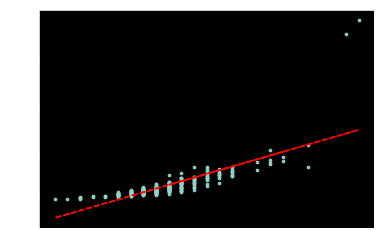

In [2]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr


import json



Mandaten = list()
Blanco = list()
kieskring = list()
kieskring.append({"gemeente":"dsfdfsd", "partij":"sdfdsfsf"})



# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=mandaten,blanco_ongeldig,kieskring&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]


def search(gemeente):
       for d in kieskring:
            if(gemeente in d.values()):
                return True
            else:
                found = False
       return found


for x in data:
    if(search(x["kieskring"]) == False):
        thisdict = {
        "gemeente": x["kieskring"],
        "mandaten" : float(x["mandaten"]),
        "blanco" : float(x["blanco_ongeldig"])
        }
        kieskring.append(thisdict)

kieskring.pop(0)

#newlist = sorted(kieskring, key=lambda k: k['mandaten']) 

#print(len(newlist))

for p in kieskring:
    #if(float(p["mandaten"]) < 49 or float(p["blanco"]) < 2000):
        Mandaten.append(p["mandaten"])
        Blanco.append(p["blanco"])



print(pearsonr(Mandaten, Blanco))
print(len(Mandaten))
marker_size=7
plt.scatter(Mandaten, Blanco, marker_size)

z = np.polyfit(Mandaten, Blanco, 1)
p = np.poly1d(z)
plt.plot(Mandaten,p(Mandaten),"r--")


plt.show()

#Er is een verband, er zijn meer ongeldige stemmen in grotere gemeentes (waar er meer mandaten zijn)
#sterke positieve correlatie






